In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score


In [2]:
# Loading Data
df = pd.read_csv("Data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Examine Data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Preparing Data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5
)

In [13]:
# Scaling Data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

,Model,Accuracy,AUC,Precision,Recall,F1 Score
0,Logistic Regression,0.891,0.929,0.931,0.833,0.863
1,KNN,0.913,0.930,0.916,0.884,0.897
2,Random Forest,0.804,0.892,0.779,0.769,0.773


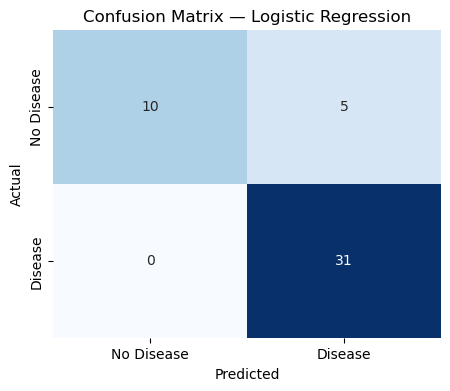

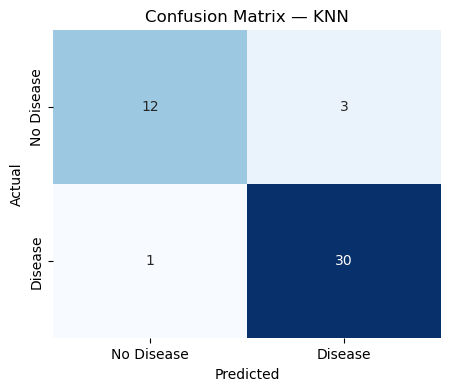

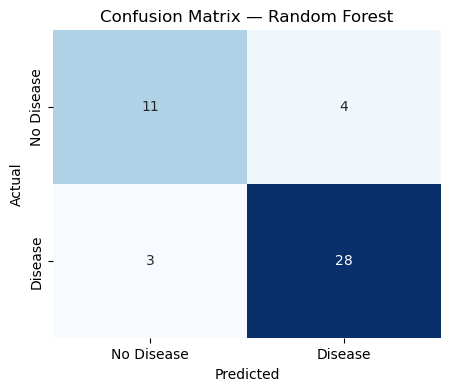

In [24]:
# Seeking the best model
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

rows = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    preds = model.predict(X_test_scaled)
    probas = model.predict_proba(X_test_scaled)[:, 1]

    report = classification_report(y_test, preds, output_dict=True)

    rows.append([
        name,
        round(model.score(X_test_scaled, y_test), 3),              # Accuracy
        round(roc_auc_score(y_test, probas), 3),                   # AUC
        round(report["macro avg"]["precision"], 3),               # Precision
        round(report["macro avg"]["recall"], 3),                  # Recall
        round(report["macro avg"]["f1-score"], 3)                 # F1 score
    ])

    conf_matrices[name] = confusion_matrix(y_test, preds)

results_df = pd.DataFrame(rows, columns=[
    "Model", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"
])

display(results_df)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, preds)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()